#                                           J COMPONENT IMPLEMENTATION

# CHURN PREDICTION IN OVER-THE-TOP(OTT) FOR CUSTOMER RETENSION USING MACHINE LEARNING ALGORITHMS

In [2]:
# IMPORTING LIBRARIES
import numpy as np # for numerical computing
import pandas as pd # for dataframes
import seaborn as sns # for easier visualization
from matplotlib import pyplot as plt # for visualization and to display plots
from matplotlib.colors import ListedColormap # import color maps

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [5]:
# Reading the dataset and storing it in  variable 'OTT_Churn' 
OTT_Churn = pd.read_csv("D:\Amulya\Amulya VIT\Sem-6\Information Visualization\ott_churn_model_dataset.csv")
# Printing the dataset
OTT_Churn

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2020,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2020,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2020,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2020,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2020,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2020,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2020,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2020,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [6]:
# Dropping the column 'customer_id' and 'year'
OTT_Churn.drop('customer_id', axis='columns', inplace=True)
OTT_Churn.drop('year', axis='columns', inplace=True)

In [7]:
# Seeing the data types of each and every attribute
OTT_Churn.dtypes

phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [8]:
# seeing the information of dataset
OTT_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_no                2000 non-null   object 
 1   gender                  1976 non-null   object 
 2   age                     2000 non-null   int64  
 3   no_of_days_subscribed   2000 non-null   int64  
 4   multi_screen            2000 non-null   object 
 5   mail_subscribed         2000 non-null   object 
 6   weekly_mins_watched     2000 non-null   float64
 7   minimum_daily_mins      2000 non-null   float64
 8   maximum_daily_mins      2000 non-null   float64
 9   weekly_max_night_mins   2000 non-null   int64  
 10  videos_watched          2000 non-null   int64  
 11  maximum_days_inactive   1972 non-null   float64
 12  customer_support_calls  2000 non-null   int64  
 13  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(4)
memor

In [9]:
# Printing all the columns of dataset
OTT_Churn.columns

Index(['phone_no', 'gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

Types of features :

1)Categorical : gender, multi_screen, mail_subscribed, churn 

2)Continuous : age, no_of_days_subscribed, weekly_mins_watched, minimum_daily_mins, maximum_daily_mins, weekly_max_night_mins, videos_watched, maximum_days_inactive, customer_support_calls 

3)Alphanumeric: phone_no

Since the attribute 'phone_no' is alphanumeric we will drop that attribute too

In [10]:
OTT_Churn.drop('phone_no', axis='columns', inplace=True)

In [11]:
OTT_Churn.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# Handling Null Values

In [12]:
OTT_Churn.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

We found the null values in the attributes 'gender', 'maximum_days_inactive', 'churn'. We fill with mode in 'gender' and with median in 'maximum_days_inactive', 'churn'.


In [13]:
# Replacing missing values with mode in the 'gender' attribute
print("The Mode is :", (OTT_Churn.gender.mode()))

The Mode is : 0    Male
Name: gender, dtype: object


In [14]:
OTT_Churn.gender.fillna('Male',inplace=True)

In [15]:
# Replacing missing values with mode in the 'maximum_days_inactive.median' attribute
print("The Median is :", int(OTT_Churn.maximum_days_inactive.median()))

The Median is : 3


In [16]:
OTT_Churn.maximum_days_inactive.fillna(3, inplace=True)

In [17]:
# Replacing missing values with mode in the 'churn' attribute
print("The Median is :", int(OTT_Churn.churn.median()))

The Median is : 0


In [18]:
OTT_Churn.churn.fillna(0, inplace=True)

We will check whether null values are there

In [19]:
OTT_Churn.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

Therefore there are no missing values and we can proceed further

# Outlier Detection

Since every record is important and have impact on churn prediction we let the outliers also be part of the built machine learning models.

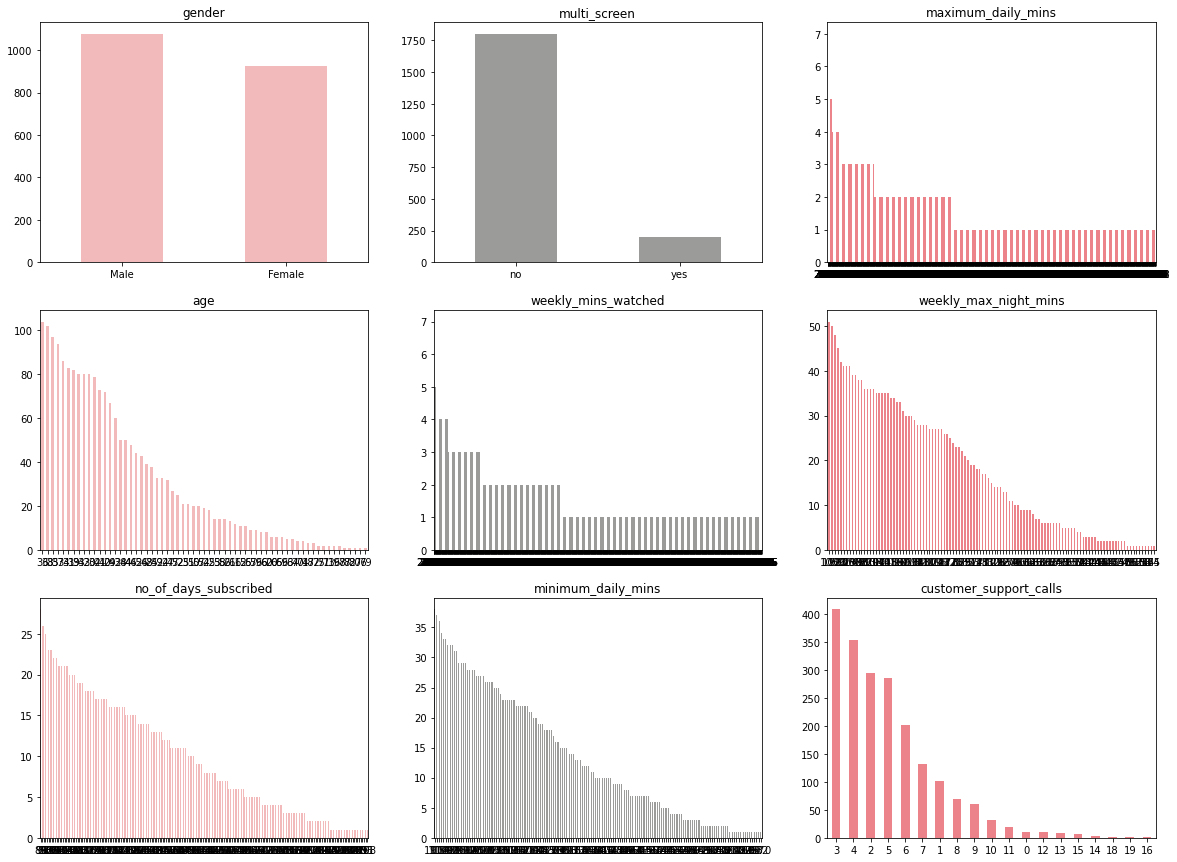

In [20]:
# Plotting Bar chart
BarPlot = OTT_Churn[['gender','age','no_of_days_subscribed','multi_screen','weekly_mins_watched',
                      'minimum_daily_mins','maximum_daily_mins','weekly_max_night_mins','videos_watched',
                     'maximum_days_inactive','customer_support_calls']]
fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (20,15))
for i, item in enumerate(BarPlot):
    if i < 3:
        ax = OTT_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = OTT_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1], rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = OTT_Churn[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#ec838a')
    ax.set_title(item)

# Scatter Plot

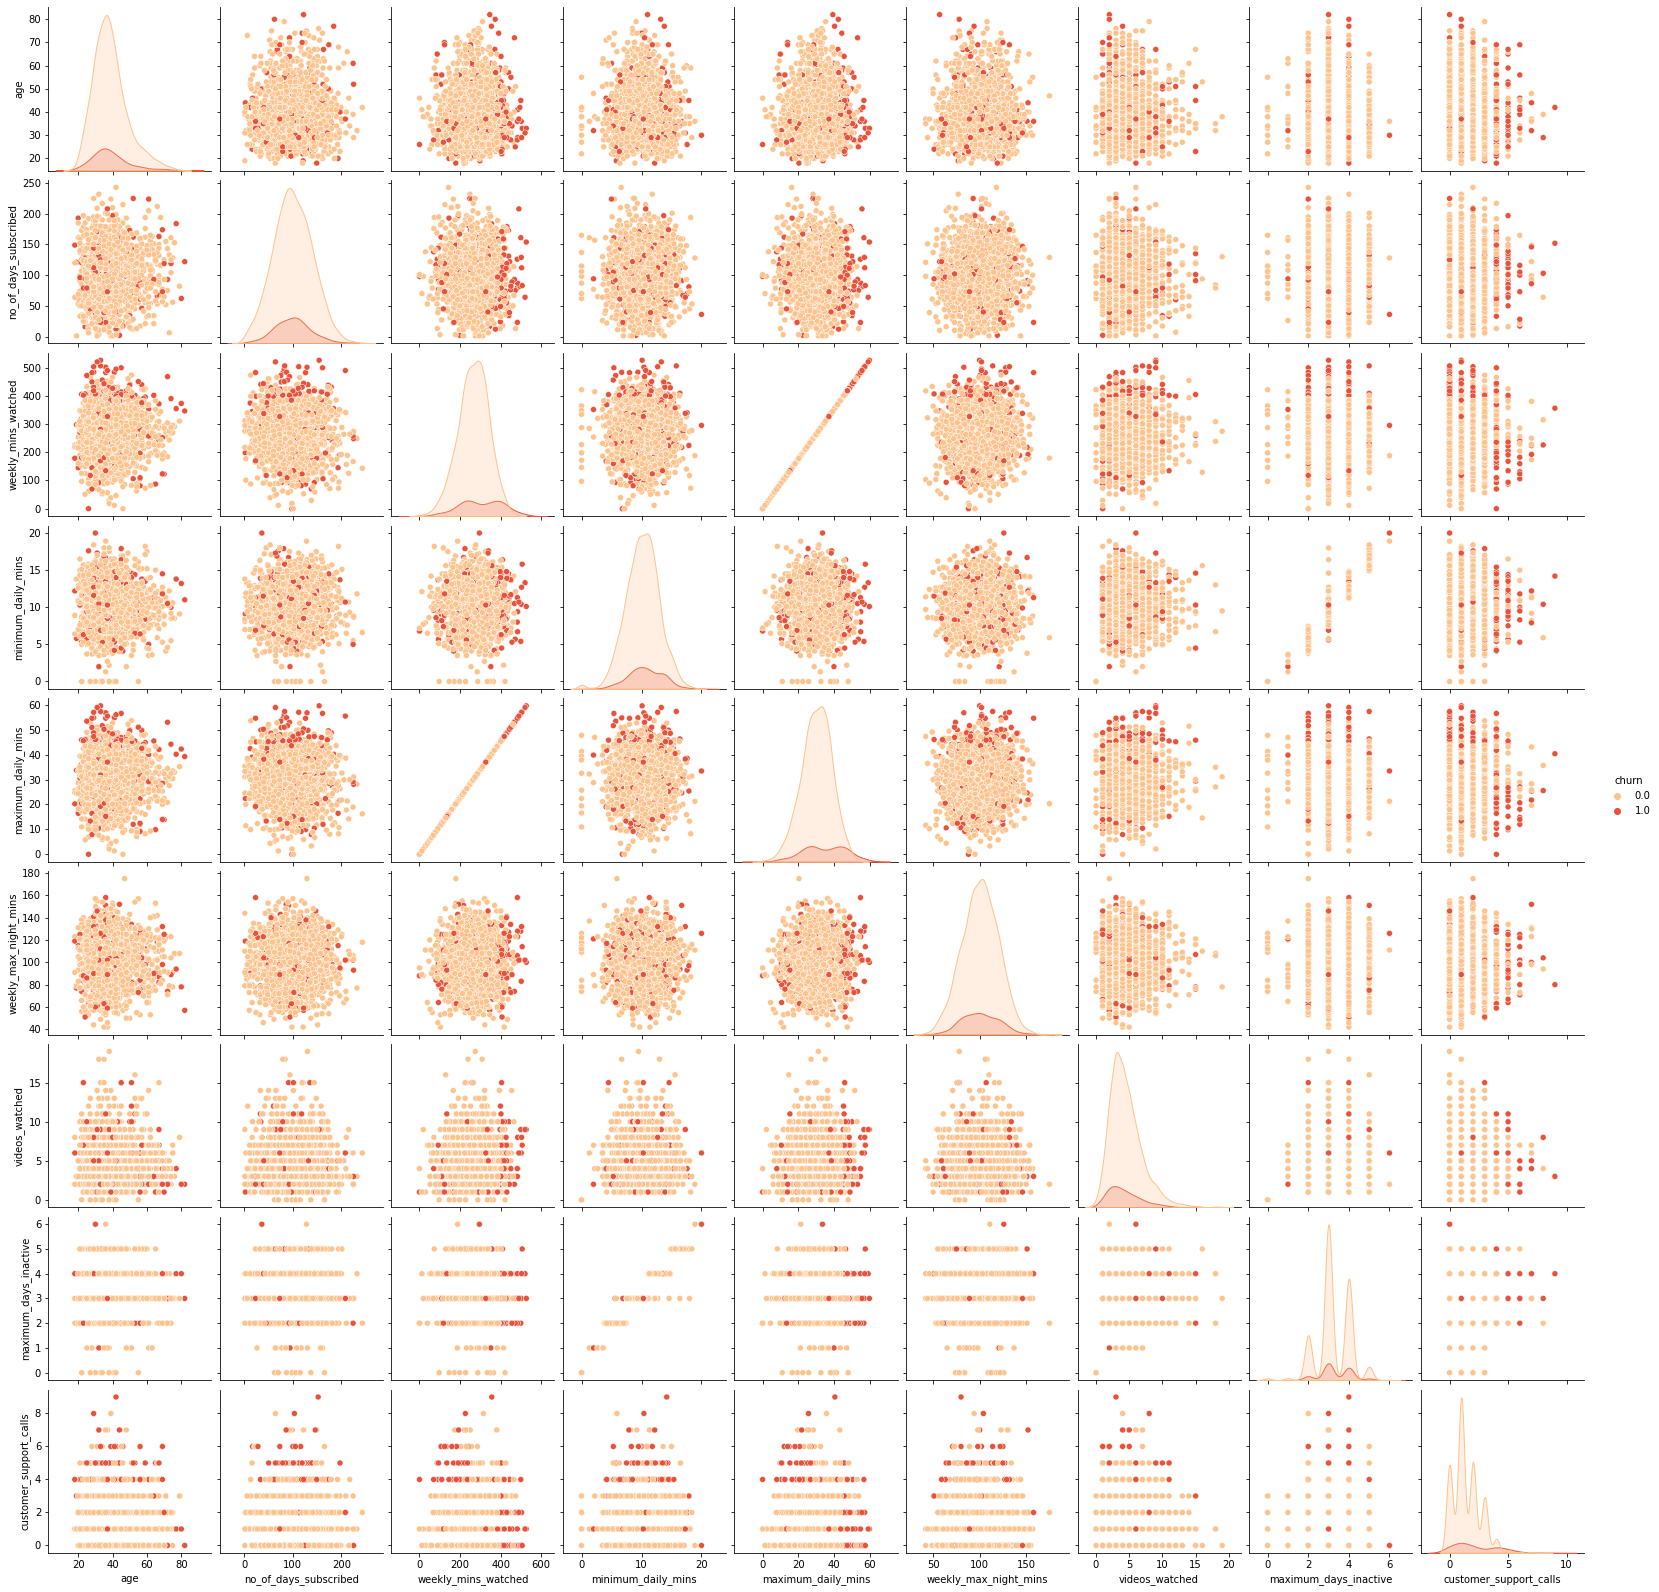

In [21]:
# Scatter plot
col = OTT_Churn.columns
plot = sns.pairplot(OTT_Churn[col],hue='churn',palette='OrRd')

# Correlation Matrix

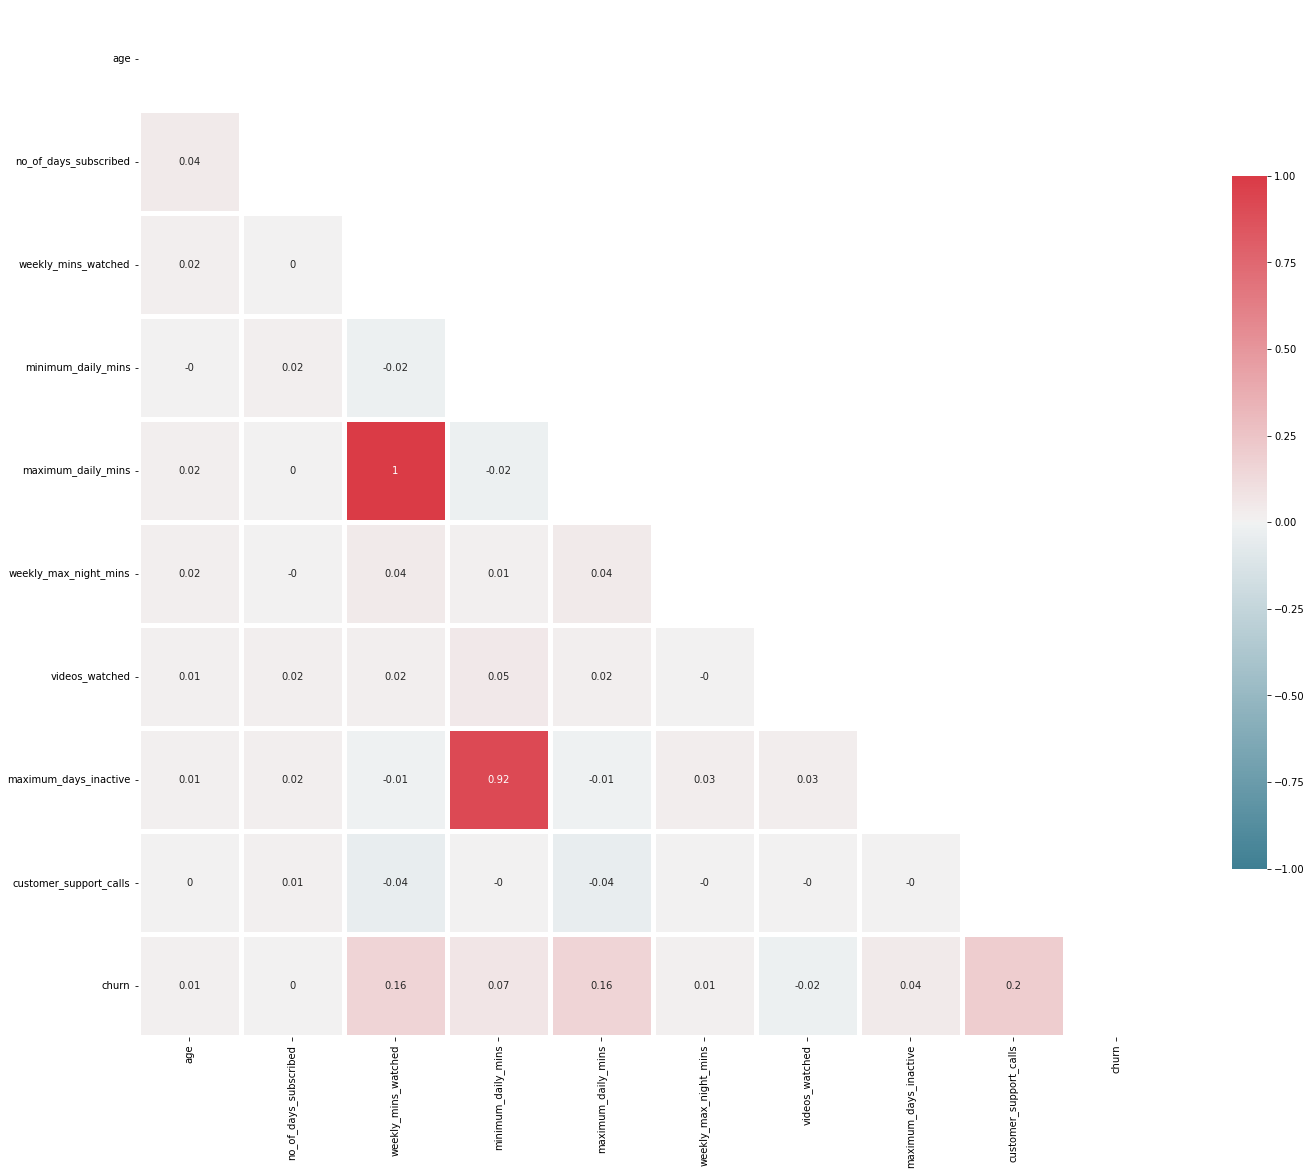

In [23]:
#plotting correlation matrix
corr = OTT_Churn.corr().round(2)

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)]  = True

f, ax = plt.subplots(figsize = (20,20))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0, square= True,
           linewidth = 5, cbar_kws = {"shrink": .5}, annot = True)

plt.tight_layout()

# Converting Categorical Data Into Numerical Data

In [21]:
# Converting through dummies function and storing it in variable 'Churn'
Churn = pd.get_dummies(OTT_Churn,columns=['gender','multi_screen','mail_subscribed'],drop_first=True)
Churn.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Male,multi_screen_yes,mail_subscribed_yes
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,0,0,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,0,0,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,0,0,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,0,0,0


# Splitting out data into X: features and Y: target

In [22]:
#Splitting out training data into X: features and Y: target
X = Churn.drop("churn",axis=1) 
Y = Churn["churn"]

# Standardization of Data

In [23]:
# Importing library
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()
sc=sc.fit(X)
X=sc.transform(X)

# Splitting the data into Training Data and Test Data

In [25]:
# Splitting of training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=69)

# Logistic Regression

In [26]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

In [27]:
# Accuracy of Logistic Regression
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

86.5

In [28]:
# let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,Y,cv=5) 
np.mean(cv_scores)*100

87.1

In [29]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)
print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  86.5 %


[[683   8]
 [100   9]]


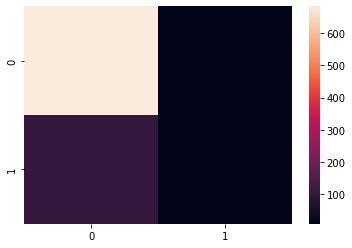

In [30]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [31]:
# Performance metrics 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       691
         1.0       0.53      0.08      0.14       109

    accuracy                           0.86       800
   macro avg       0.70      0.54      0.53       800
weighted avg       0.83      0.86      0.82       800



In [32]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_logreg=pd.DataFrame(data=Scores,index=['Logistic_regression'])
model_logreg

,Accuracy,F1_score,Recall,Precision
Logistic_regression,0.865,0.143,0.083,0.529


# Decision Tree Classification

In [33]:
#Decision Tree Classifier
# Grid Search CV
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 5}
Best score: 91.45


In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.90875


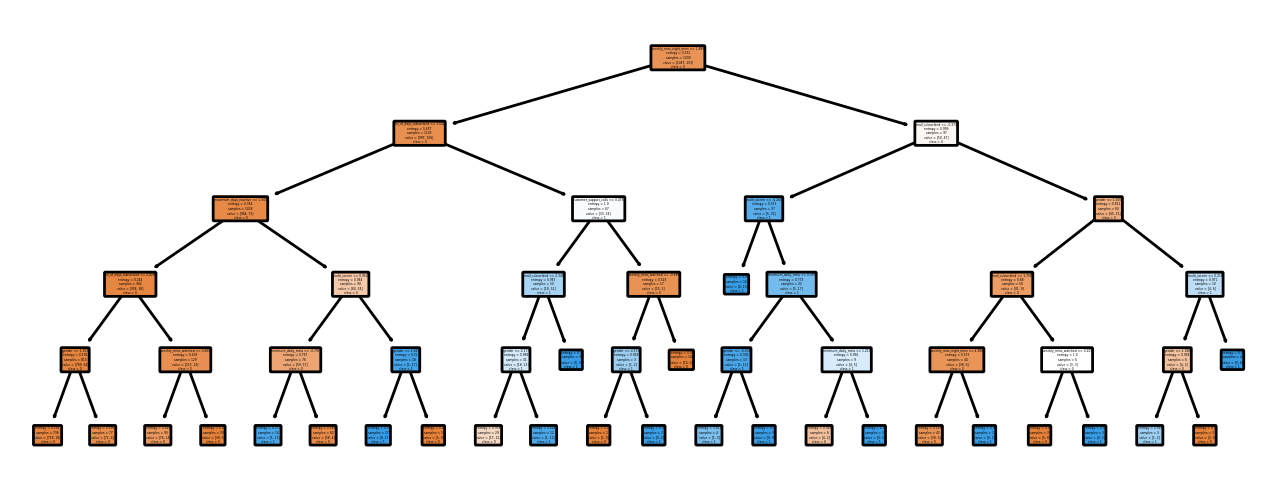

In [35]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [36]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  90.875 %


[[678  13]
 [ 60  49]]


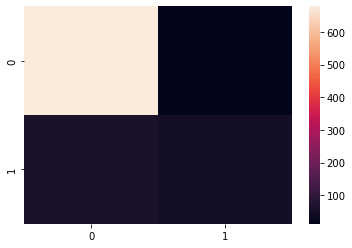

In [37]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [38]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       691
         1.0       0.79      0.45      0.57       109

    accuracy                           0.91       800
   macro avg       0.85      0.72      0.76       800
weighted avg       0.90      0.91      0.90       800



In [85]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_ID3=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_ID3'])
model_decisiontree_ID3

,Accuracy,F1_score,Recall,Precision
Decision_Tree_Classifier_ID3,0.846,0.417,0.404,0.431


In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.91


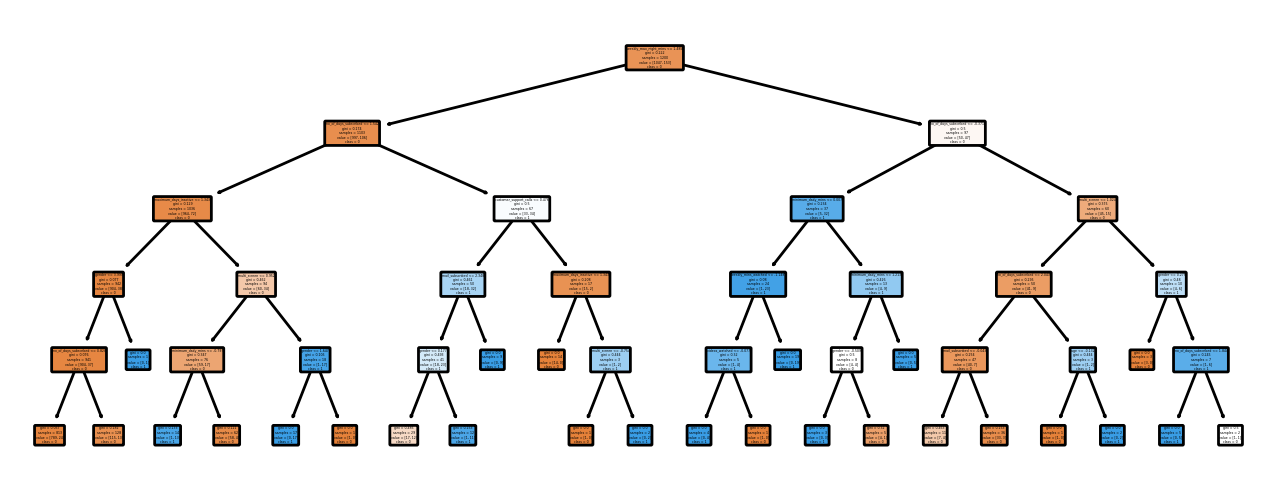

In [42]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [43]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  91.0 %


[[682   9]
 [ 63  46]]


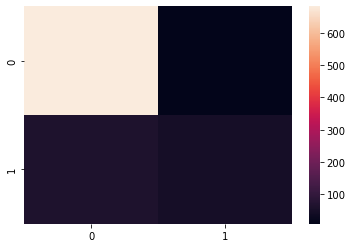

In [44]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [45]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       691
         1.0       0.84      0.42      0.56       109

    accuracy                           0.91       800
   macro avg       0.88      0.70      0.76       800
weighted avg       0.90      0.91      0.90       800



In [84]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_CART=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_CART'])
model_decisiontree_CART

,Accuracy,F1_score,Recall,Precision
Decision_Tree_Classifier_CART,0.846,0.417,0.404,0.431


# Random Forest Classifier

In [47]:
#Random Forest Classifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 15}
Best score: 92.35


In [48]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

In [49]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  91.25 %


[[677  14]
 [ 56  53]]


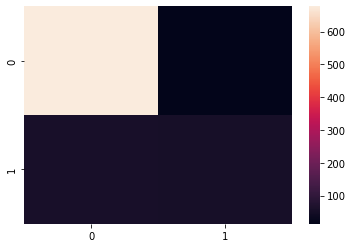

In [50]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [51]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       691
         1.0       0.79      0.49      0.60       109

    accuracy                           0.91       800
   macro avg       0.86      0.73      0.78       800
weighted avg       0.91      0.91      0.90       800



In [52]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_randomforest=pd.DataFrame(data=Scores,index=['Random_Forest'])
model_randomforest

,Accuracy,F1_score,Recall,Precision
Random_Forest,0.912,0.602,0.486,0.791


# KNN Classification

In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
  
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)

In [54]:
#Accuracy of KNN
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_knn

87.5

In [55]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  87.5 %


[[677  14]
 [ 86  23]]


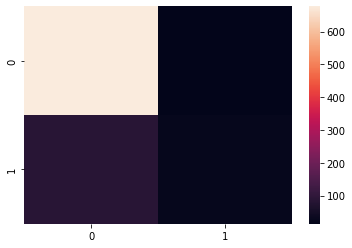

In [56]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [57]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       691
         1.0       0.62      0.21      0.32       109

    accuracy                           0.88       800
   macro avg       0.75      0.60      0.62       800
weighted avg       0.85      0.88      0.85       800



In [58]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_KNN=pd.DataFrame(data=Scores,index=['KNN_Classifier'])
model_KNN

,Accuracy,F1_score,Recall,Precision
KNN_Classifier,0.875,0.315,0.211,0.622


# SVM [Support Vector Machine]

In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [60]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  86.375 %


[[691   0]
 [109   0]]


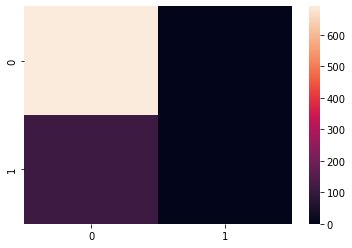

In [61]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [62]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       691
         1.0       0.00      0.00      0.00       109

    accuracy                           0.86       800
   macro avg       0.43      0.50      0.46       800
weighted avg       0.75      0.86      0.80       800



In [63]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_svm=pd.DataFrame(data=Scores,index=['Support_Vector_Machine'])
model_svm

,Accuracy,F1_score,Recall,Precision
Support_Vector_Machine,0.864,0.0,0.0,0.0


# Gradient Boosting Classifier

In [64]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 6, 'n_estimators': 19}
Best score: 92.30000000000001


In [65]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

In [66]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  87.25 %


[[671  20]
 [ 82  27]]


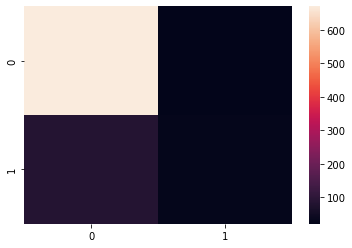

In [67]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [68]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       691
         1.0       0.57      0.25      0.35       109

    accuracy                           0.87       800
   macro avg       0.73      0.61      0.64       800
weighted avg       0.85      0.87      0.85       800



In [69]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_gradientboost=pd.DataFrame(data=Scores,index=['Gradient_Boosting'])
model_gradientboost

,Accuracy,F1_score,Recall,Precision
Gradient_Boosting,0.872,0.346,0.248,0.574


# XG Boosting

In [70]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [71]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  90.75 %


[[672  19]
 [ 55  54]]


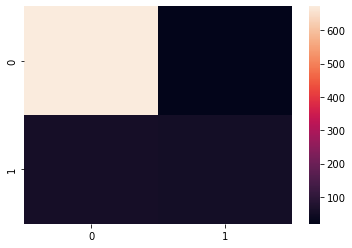

In [72]:
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [73]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       691
         1.0       0.74      0.50      0.59       109

    accuracy                           0.91       800
   macro avg       0.83      0.73      0.77       800
weighted avg       0.90      0.91      0.90       800



In [74]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_XGboost=pd.DataFrame(data=Scores,index=['XG_Boosting'])
model_XGboost

,Accuracy,F1_score,Recall,Precision
XG_Boosting,0.908,0.593,0.495,0.74


# Naive Bayes

In [77]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [78]:
Y_pred = classifier.predict(X_test)

The accuracy score is  84.625 %
[[633  58]
 [ 65  44]]


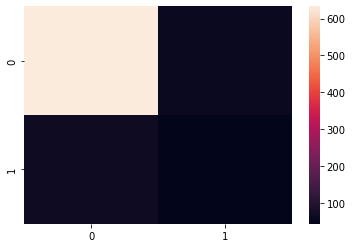

In [79]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [80]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       691
         1.0       0.43      0.40      0.42       109

    accuracy                           0.85       800
   macro avg       0.67      0.66      0.66       800
weighted avg       0.84      0.85      0.84       800



In [81]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_naive=pd.DataFrame(data=Scores,index=['Naive Bayes'])
model_naive

,Accuracy,F1_score,Recall,Precision
Naive Bayes,0.846,0.417,0.404,0.431


In [86]:
All_Models = pd.concat([model_logreg,model_decisiontree_ID3,model_decisiontree_CART,model_randomforest,model_KNN,model_svm,model_gradientboost,model_XGboost,model_naive],axis = 0)
All_Models

,Accuracy,F1_score,Recall,Precision
Logistic_regression,0.865,0.143,0.083,0.529
Decision_Tree_Classifier_ID3,0.846,0.417,0.404,0.431
Decision_Tree_Classifier_CART,0.846,0.417,0.404,0.431
Random_Forest,0.912,0.602,0.486,0.791
KNN_Classifier,0.875,0.315,0.211,0.622
Support_Vector_Machine,0.864,0.000,0.000,0.000
Gradient_Boosting,0.872,0.346,0.248,0.574
XG_Boosting,0.908,0.593,0.495,0.740
Naive Bayes,0.846,0.417,0.404,0.431


In [87]:
Sort_Models = All_Models.sort_values(by=['Accuracy'],ascending = False)
Sort_Models

,Accuracy,F1_score,Recall,Precision
Random_Forest,0.912,0.602,0.486,0.791
XG_Boosting,0.908,0.593,0.495,0.740
KNN_Classifier,0.875,0.315,0.211,0.622
Gradient_Boosting,0.872,0.346,0.248,0.574
Logistic_regression,0.865,0.143,0.083,0.529
Support_Vector_Machine,0.864,0.000,0.000,0.000
Decision_Tree_Classifier_ID3,0.846,0.417,0.404,0.431
Decision_Tree_Classifier_CART,0.846,0.417,0.404,0.431
Naive Bayes,0.846,0.417,0.404,0.431


# Comparing Machine Learning Algorithms used by plotting Bar Chart 

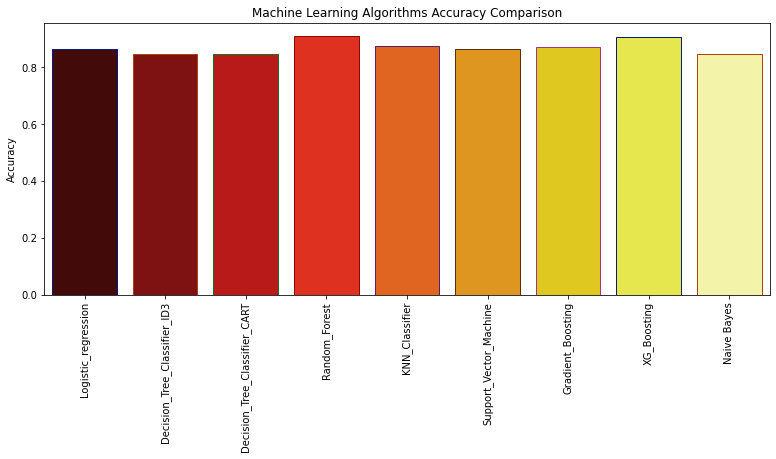

In [88]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Accuracy",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Accuracy Comparison')
plt.show()

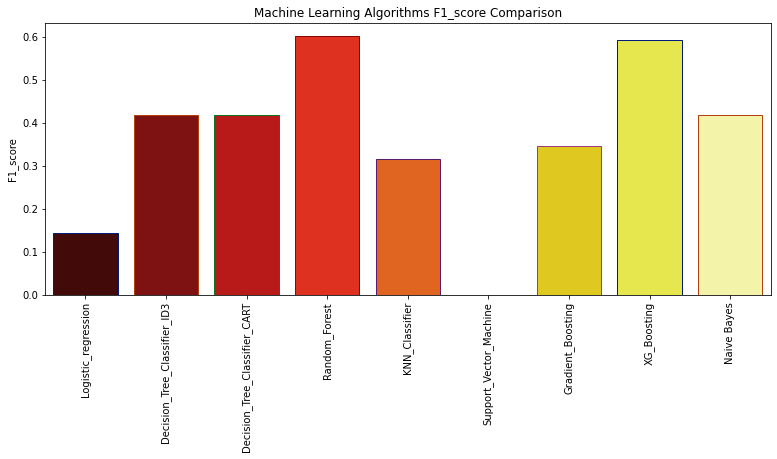

In [89]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="F1_score",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms F1_score Comparison')
plt.show()

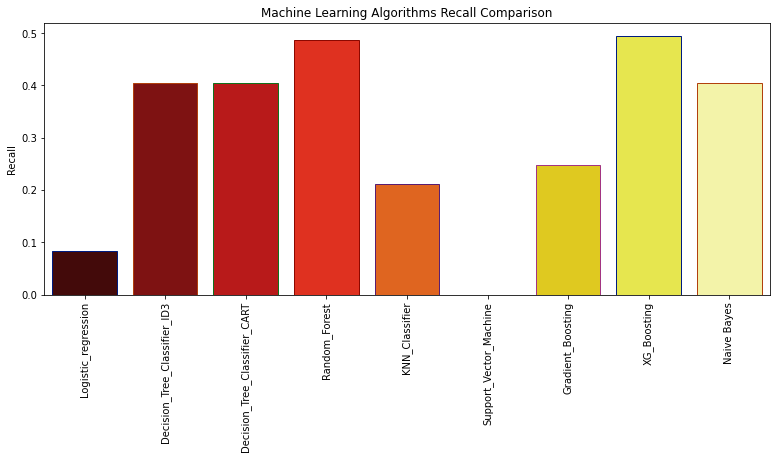

In [90]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Recall",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Recall Comparison')
plt.show()

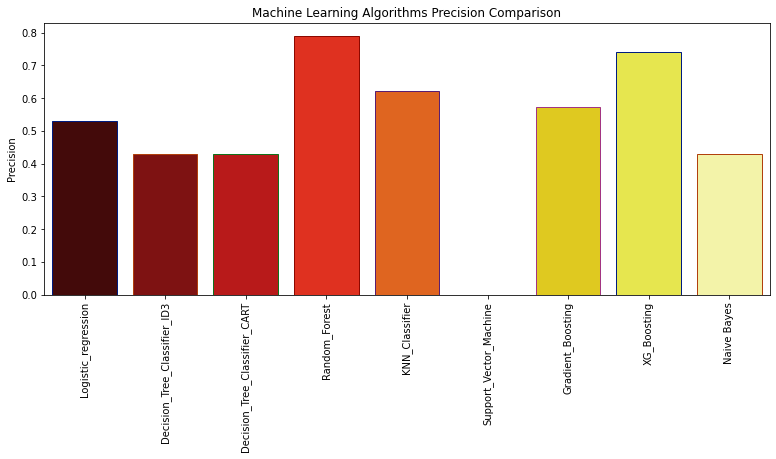

In [91]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_Models.index , y="Precision",data=All_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Precision Comparison')
plt.show()

Here we observe that F1 score is less for all models, it is because the class is highly imbalnced and this class imbalance 
is treated using SMOTE

In [92]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 153
Before OverSampling, counts of label '0': 1047 



In [93]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [94]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

After OverSampling, the shape of train_X: (2094, 12)
After OverSampling, the shape of train_y: (2094,) 

After OverSampling, counts of label '1': 1047
After OverSampling, counts of label '0': 1047


# Checking model performance after over sampling

# Logistic Regression

In [95]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_res, Y_train_res)
Y_pred = logreg.predict(X_test)

In [96]:
# Accuracy of Logistic Regression
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

74.5

In [97]:
# let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,Y,cv=5) 
np.mean(cv_scores)*100

87.1

In [98]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)
print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  74.5 %


[[520 171]
 [ 33  76]]


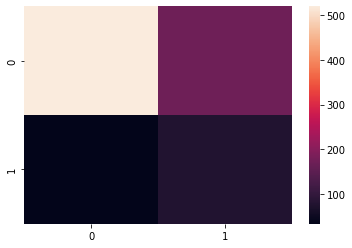

In [99]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [100]:
# Performance metrics 
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84       691
         1.0       0.31      0.70      0.43       109

    accuracy                           0.74       800
   macro avg       0.62      0.72      0.63       800
weighted avg       0.85      0.74      0.78       800



In [101]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_logreg_SMOTE=pd.DataFrame(data=Scores,index=['Logistic_regression_SMOTE'])
model_logreg_SMOTE

,Accuracy,F1_score,Recall,Precision
Logistic_regression_SMOTE,0.745,0.427,0.697,0.308


# Decision Tree Classification

In [102]:
#Decision Tree Classifier
# Grid Search CV
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 5}
Best score: 91.55000000000001


In [103]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train_res, Y_train_res)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.89


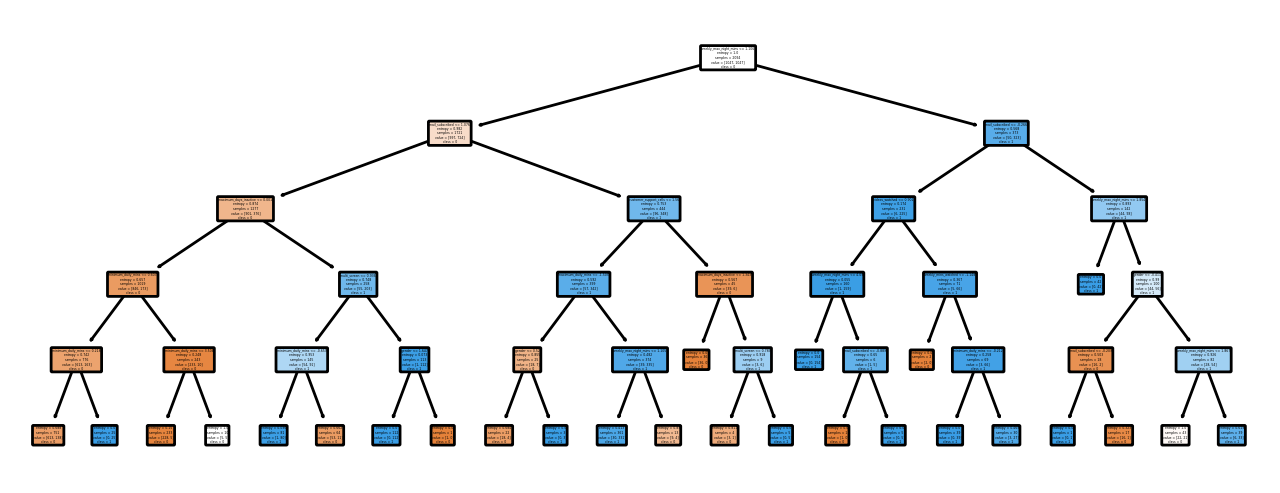

In [104]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [105]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  89.0 %


[[642  49]
 [ 39  70]]


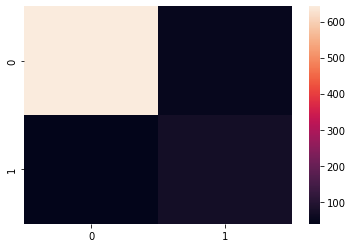

In [106]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [107]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       691
         1.0       0.59      0.64      0.61       109

    accuracy                           0.89       800
   macro avg       0.77      0.79      0.77       800
weighted avg       0.89      0.89      0.89       800



In [108]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_ID3_SMOTE=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_ID3_SMOTE'])
model_decisiontree_ID3_SMOTE

,Accuracy,F1_score,Recall,Precision
Decision_Tree_Classifier_ID3_SMOTE,0.89,0.614,0.642,0.588


In [109]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train_res, Y_train_res)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8975


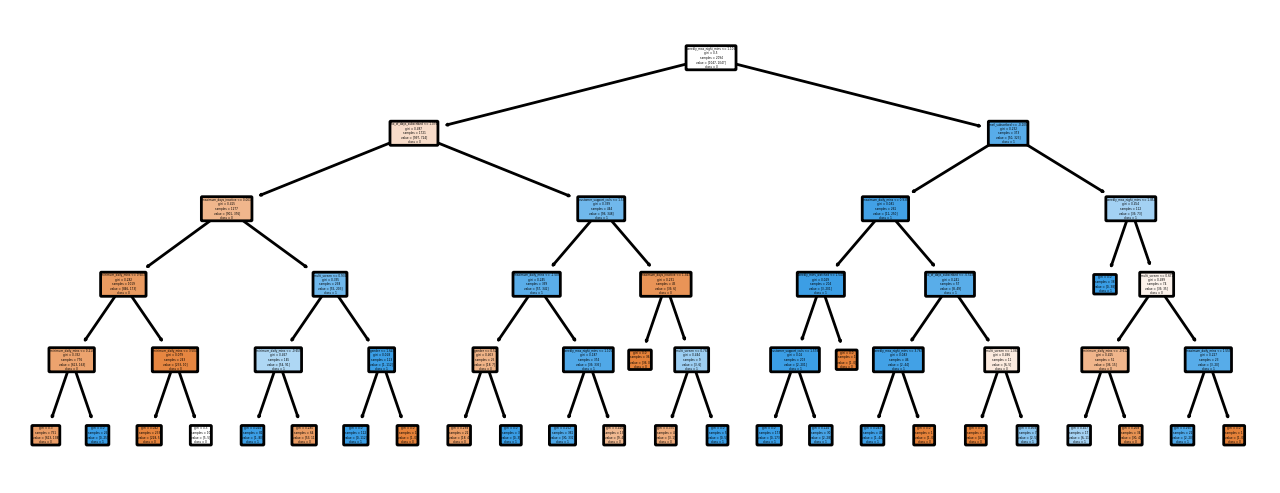

In [110]:
from sklearn import tree
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=OTT_Churn.columns,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('churn.png')

In [111]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  89.75 %


[[644  47]
 [ 35  74]]


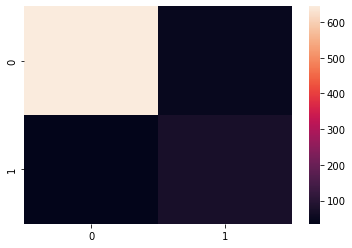

In [112]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [113]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       691
         1.0       0.61      0.68      0.64       109

    accuracy                           0.90       800
   macro avg       0.78      0.81      0.79       800
weighted avg       0.90      0.90      0.90       800



In [114]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_decisiontree_CART_SMOTE=pd.DataFrame(data=Scores,index=['Decision_Tree_Classifier_CART_SMOTE'])
model_decisiontree_CART_SMOTE

,Accuracy,F1_score,Recall,Precision
Decision_Tree_Classifier_CART_SMOTE,0.898,0.643,0.679,0.612


# Random Forest Classifier

In [115]:
#Random Forest Classifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 13}
Best score: 92.15


In [116]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_res, Y_train_res)
Y_pred=classifier.predict(X_test)

In [117]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  89.75 %


[[649  42]
 [ 40  69]]


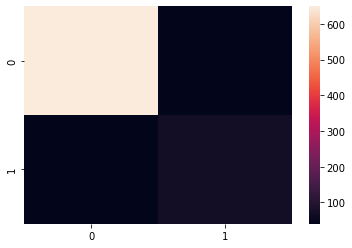

In [118]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [119]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       691
         1.0       0.62      0.63      0.63       109

    accuracy                           0.90       800
   macro avg       0.78      0.79      0.78       800
weighted avg       0.90      0.90      0.90       800



In [120]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_randomforest_SMOTE=pd.DataFrame(data=Scores,index=['Random_Forest_SMOTE'])
model_randomforest_SMOTE

,Accuracy,F1_score,Recall,Precision
Random_Forest_SMOTE,0.898,0.627,0.633,0.622


# KNN Classification

In [121]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
  
KNN.fit(X_train_res, Y_train_res)
Y_pred = KNN.predict(X_test)

In [122]:
#Accuracy of KNN
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_knn

76.5

In [123]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  76.5 %


[[537 154]
 [ 34  75]]


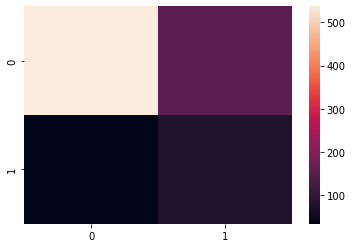

In [124]:
# Confusion matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [125]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85       691
         1.0       0.33      0.69      0.44       109

    accuracy                           0.77       800
   macro avg       0.63      0.73      0.65       800
weighted avg       0.86      0.77      0.80       800



In [126]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_KNN_SMOTE=pd.DataFrame(data=Scores,index=['KNN_Classifier_SMOTE'])
model_KNN_SMOTE

,Accuracy,F1_score,Recall,Precision
KNN_Classifier_SMOTE,0.765,0.444,0.688,0.328


# SVM [Support Vector Machine]

In [127]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_res, Y_train_res)
Y_pred = classifier.predict(X_test)

In [128]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  74.0 %


[[516 175]
 [ 33  76]]


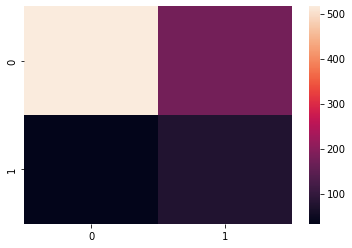

In [129]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [130]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83       691
         1.0       0.30      0.70      0.42       109

    accuracy                           0.74       800
   macro avg       0.62      0.72      0.63       800
weighted avg       0.85      0.74      0.78       800



In [131]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_svm_SMOTE=pd.DataFrame(data=Scores,index=['Support_Vector_Machine_SMOTE'])
model_svm_SMOTE

,Accuracy,F1_score,Recall,Precision
Support_Vector_Machine_SMOTE,0.74,0.422,0.697,0.303


# Gradient Boosting Classifier

In [132]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 5, 'n_estimators': 17}
Best score: 92.2


In [133]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_res, Y_train_res)
Y_pred=classifier.predict(X_test)

In [134]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  87.0 %


[[644  47]
 [ 57  52]]


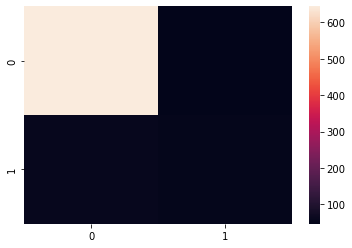

In [135]:
# Confusion Matrix
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [136]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       691
         1.0       0.53      0.48      0.50       109

    accuracy                           0.87       800
   macro avg       0.72      0.70      0.71       800
weighted avg       0.87      0.87      0.87       800



In [137]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_gradientboost_SMOTE=pd.DataFrame(data=Scores,index=['Gradient_Boosting_SMOTE'])
model_gradientboost_SMOTE

,Accuracy,F1_score,Recall,Precision
Gradient_Boosting_SMOTE,0.87,0.5,0.477,0.525


# XG Boosting

In [138]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_res, Y_train_res)
Y_pred = classifier.predict(X_test)

In [139]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')

The accuracy score is  91.0 %


[[666  25]
 [ 47  62]]


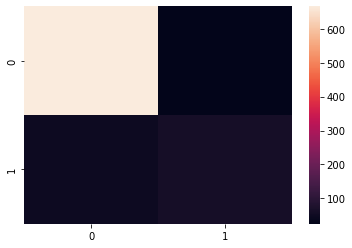

In [140]:
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [141]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       691
         1.0       0.71      0.57      0.63       109

    accuracy                           0.91       800
   macro avg       0.82      0.77      0.79       800
weighted avg       0.90      0.91      0.91       800



In [142]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_XGboost_SMOTE=pd.DataFrame(data=Scores,index=['XG_Boosting_SMOTE'])
model_XGboost_SMOTE

,Accuracy,F1_score,Recall,Precision
XG_Boosting_SMOTE,0.91,0.633,0.569,0.713


In [143]:
classifier = GaussianNB()
classifier.fit(X_train_res, Y_train_res)

GaussianNB()

In [144]:
Y_pred = classifier.predict(X_test)

The accuracy score is  80.25 %
[[565 126]
 [ 32  77]]


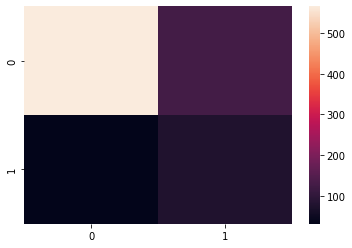

In [145]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [146]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       691
         1.0       0.38      0.71      0.49       109

    accuracy                           0.80       800
   macro avg       0.66      0.76      0.69       800
weighted avg       0.87      0.80      0.83       800



In [147]:
Scores = {'Accuracy':round(accuracy_score(Y_test,Y_pred),3),'F1_score':round(f1_score(Y_test,Y_pred),3),'Recall':round(recall_score(Y_test,Y_pred),3),'Precision':round(precision_score(Y_test,Y_pred),3)}
Scores
model_naive_SMOTE=pd.DataFrame(data=Scores,index=['Naive Bayes_SMOTE'])
model_naive_SMOTE

,Accuracy,F1_score,Recall,Precision
Naive Bayes_SMOTE,0.802,0.494,0.706,0.379


In [149]:
All_ML_Models = pd.concat([model_logreg,model_decisiontree_ID3,model_decisiontree_CART,model_randomforest,
                           model_KNN,model_svm,model_gradientboost,model_XGboost,model_naive,model_logreg_SMOTE,
                           model_decisiontree_ID3_SMOTE,model_decisiontree_CART_SMOTE,model_randomforest_SMOTE,model_KNN_SMOTE,
                           model_svm,model_gradientboost_SMOTE,model_XGboost_SMOTE,model_naive_SMOTE],axis = 0)
All_ML_Models

,Accuracy,F1_score,Recall,Precision
Logistic_regression,0.865,0.143,0.083,0.529
Decision_Tree_Classifier_ID3,0.846,0.417,0.404,0.431
Decision_Tree_Classifier_CART,0.846,0.417,0.404,0.431
Random_Forest,0.912,0.602,0.486,0.791
KNN_Classifier,0.875,0.315,0.211,0.622
Support_Vector_Machine,0.864,0.000,0.000,0.000
Gradient_Boosting,0.872,0.346,0.248,0.574
XG_Boosting,0.908,0.593,0.495,0.740
Naive Bayes,0.846,0.417,0.404,0.431
Logistic_regression_SMOTE,0.745,0.427,0.697,0.308


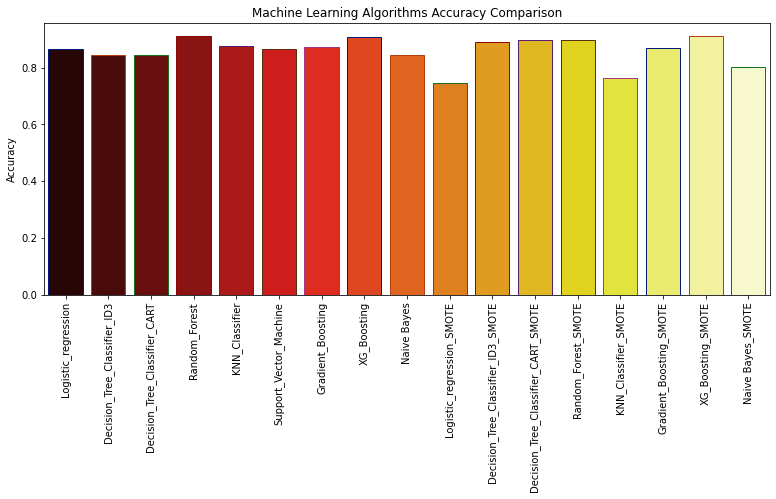

In [150]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="Accuracy",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Accuracy Comparison')
plt.show()

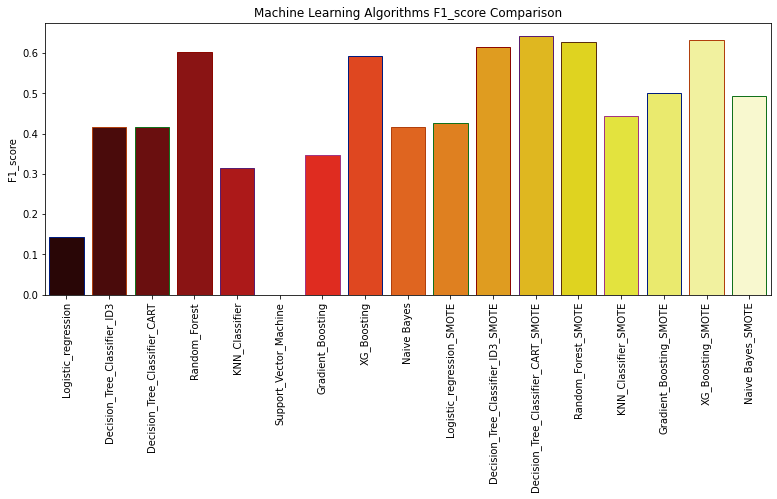

In [151]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="F1_score",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms F1_score Comparison')
plt.show()

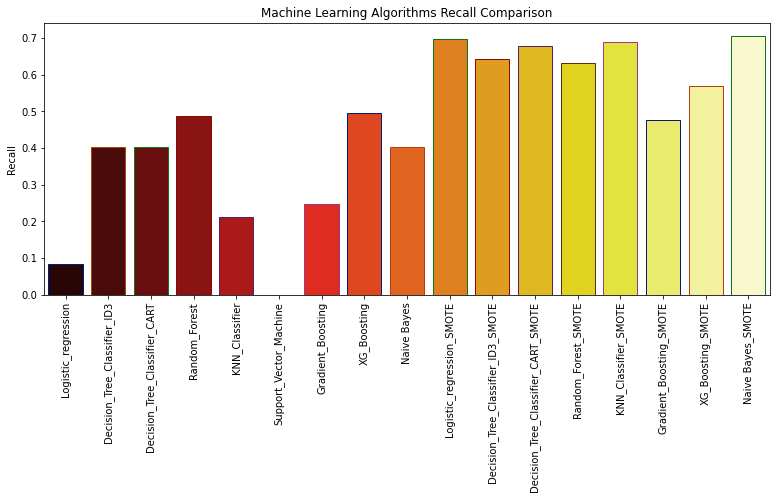

In [152]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="Recall",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Recall Comparison')
plt.show()

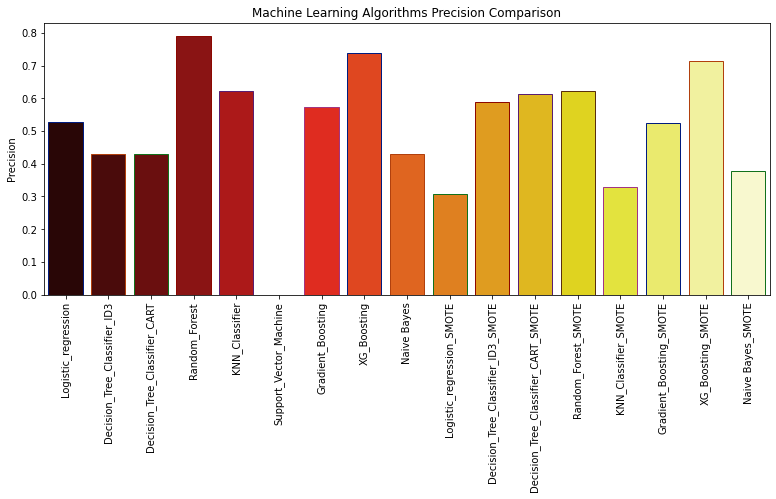

In [153]:
plt.subplots(figsize=(13,5))
sns.barplot(x=All_ML_Models.index , y="Precision",data=All_ML_Models,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Machine Learning Algorithms Precision Comparison')
plt.show()